In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = {
    'Income_Group': ["Bottom 20%", "Second 20%", "Third 20%", "Fourth 20%", "Next 15%", "Next 4%", "Top 1%"],
    'Income_Range_Start': [0, 25000, 52000, 84000, 135000, 270000, 626000],
    'Income_Range_End': [25000, 52000, 84000, 135000, 270000, 626000, 1500000],
    'Average_Income': [13000, 38000, 67000, 111000, 183000, 376000, 1403000],
    'Population': [289430, 289430, 289430, 289430, 217073, 57886, 14471],
    'Tax_Change_as_Percent_of_Income_U18': [-1.19, -0.51, -0.20, -0.06, 0.00, 0.00, 0.00],
    'Average_Tax_Change_U18': [-152, -194, -136, -66, -7, -2, -2],
    'Percent_with_Income_Tax_Cut_U18': [15.5, 16.2, 20.5, 19.3, 1.7, 0.7, 1.8],
    'Avg_Tax_Cut_for_those_With_Cut_U18': [979, 1200, 662, 340, 399, 252, 130],
    'Share_of_Resident_Tax_Cut_U18': [26.8, 34.5, 24.1, 11.6, 0.9, 0.1, 0.0]
}

income_data = pd.DataFrame(data)








In [10]:
income_data

,Income_Group,Income_Range_Start,Income_Range_End,Average_Income,Population,Tax_Change_as_Percent_of_Income_U18,Average_Tax_Change_U18,Percent_with_Income_Tax_Cut_U18,Avg_Tax_Cut_for_those_With_Cut_U18,Share_of_Resident_Tax_Cut_U18
0,Bottom 20%,0,25000,13000,289430,-1.19,-152,15.5,979,26.8
1,Second 20%,25000,52000,38000,289430,-0.51,-194,16.2,1200,34.5
2,Third 20%,52000,84000,67000,289430,-0.20,-136,20.5,662,24.1
3,Fourth 20%,84000,135000,111000,289430,-0.06,-66,19.3,340,11.6
4,Next 15%,135000,270000,183000,217073,0.00,-7,1.7,399,0.9
5,Next 4%,270000,626000,376000,57886,0.00,-2,0.7,252,0.1
6,Top 1%,626000,1500000,1403000,14471,0.00,-2,1.8,130,0.0


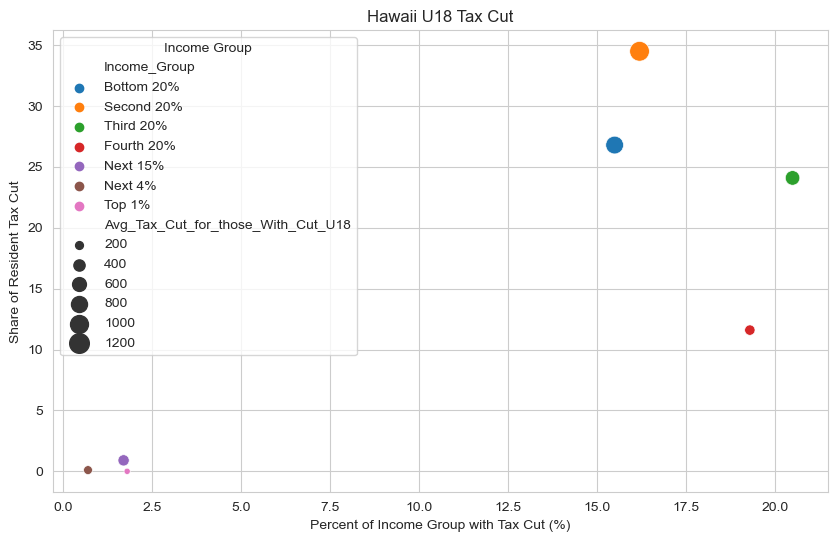

In [11]:
# Set up the plot style
sns.set_style("whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=income_data,
                x='Percent_with_Income_Tax_Cut_U18',
                y='Share_of_Resident_Tax_Cut_U18',
                hue='Income_Group',
                size='Avg_Tax_Cut_for_those_With_Cut_U18',
                sizes=(20, 200),
                palette='tab10')

# Set plot labels and title
plt.xlabel("Percent of Income Group with Tax Cut (%)")
plt.ylabel("Share of Resident Tax Cut")
plt.title("Hawaii U18 Tax Cut")
plt.legend(title="Income Group")

# Show the plot
plt.show()